c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

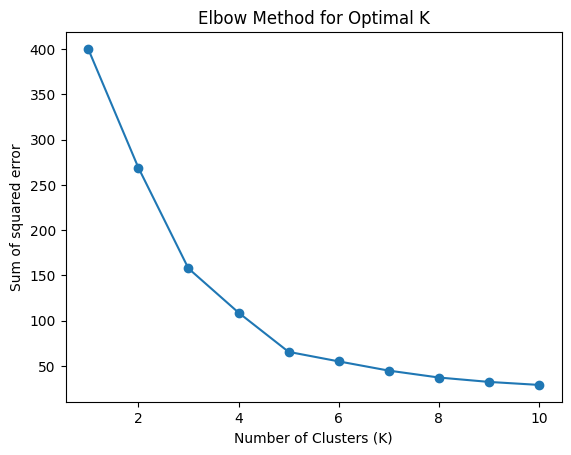

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


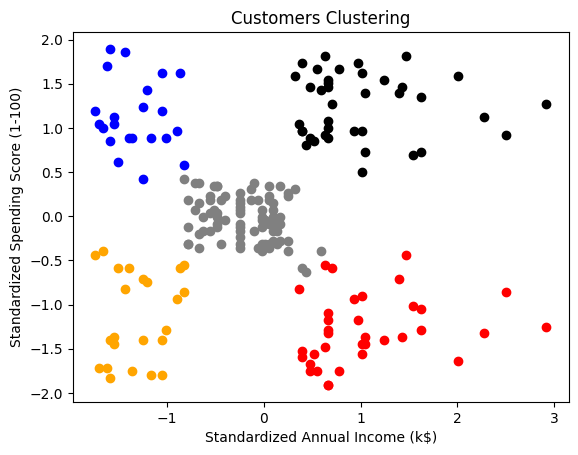

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Clusters  
0           4  
1           1  
2           4  
3           1  
4      

In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("E:/prodigy infoTech/Mall_Customers.csv")

# Select relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to determine the optimal number of clusters
sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    sse.append(km.inertia_)

# Ploting the elbow graph
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of squared error')
plt.show()

# Choose the optimal number of clusters (K)
optimal_k = 5  

# Apply K-means clustering with the optimal K
km = KMeans(n_clusters=optimal_k)
y_predicted = km.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[y_predicted == 0, 0], X_scaled[y_predicted == 0, 1], color='red')
plt.scatter(X_scaled[y_predicted == 1, 0], X_scaled[y_predicted == 1, 1], color='blue')
plt.scatter(X_scaled[y_predicted == 2, 0], X_scaled[y_predicted == 2, 1], color='grey')
plt.scatter(X_scaled[y_predicted == 3, 0], X_scaled[y_predicted == 3, 1], color='black')
plt.scatter(X_scaled[y_predicted == 4, 0], X_scaled[y_predicted == 4, 1], color='orange')

plt.title('Customers Clustering')
plt.xlabel('Standardized Annual Income (k$)')
plt.ylabel('Standardized Spending Score (1-100)')
plt.show()

# Add the cluster labels to the original data
data["Clusters"] = y_predicted
print(data)
